In [1]:
from env import *

In [2]:
# Outcome distribution
m = 10
p_vec = [0.5,0.65,0.8]
f_ij = np.vstack([
    stats.binom.pmf(np.arange(m+1), m, p)
    for p in p_vec
])

print('Outcome distribution:',f_ij,sep='\n')

sf_ij = 1-f_ij.cumsum(axis=1)

# Cost vector
cost = np.array([0,0.45,1])
print('Action cost:',cost,sep='\n')

cdp = dclf.ContractDesignProblem(f_ij=f_ij,cost=cost)
t_lp = dclf.MinBudgetContract.design(cdp)
t_01 = dclf.MinBudgetStatisticalContract.design(cdp,monotone=False,binary_domain=True)

j0 = lambda i: (f_ij[-1]-f_ij[i]>=0).argmax()

Outcome distribution:
[[9.76562500e-04 9.76562500e-03 4.39453125e-02 1.17187500e-01
  2.05078125e-01 2.46093750e-01 2.05078125e-01 1.17187500e-01
  4.39453125e-02 9.76562500e-03 9.76562500e-04]
 [2.75854735e-05 5.12301651e-04 4.28137809e-03 2.12030153e-02
  6.89097997e-02 1.53570411e-01 2.37668493e-01 2.52219625e-01
  1.75652953e-01 7.24916949e-02 1.34627433e-02]
 [1.02400000e-07 4.09600000e-06 7.37280000e-05 7.86432000e-04
  5.50502400e-03 2.64241152e-02 8.80803840e-02 2.01326592e-01
  3.01989888e-01 2.68435456e-01 1.07374182e-01]]
Action cost:
[0.   0.45 1.  ]


In [3]:
format_contract = lambda contract: ', '.join(f'{x:.2g}' for x in contract['t'])
print('LP contract: ', format_contract(t_lp))
print('IP contract: ', format_contract(t_01))

LP contract:  0, 0, 0, 0, 0, 0, 0, 1.1, 1.5, 1.5, 1.5
IP contract:  0, 0, 0, 0, 0, 0, 0, 1.5, 1.5, 1.5, 1.5


Figure saved as ./output/contract_design_multi_action_counterexample.pdf


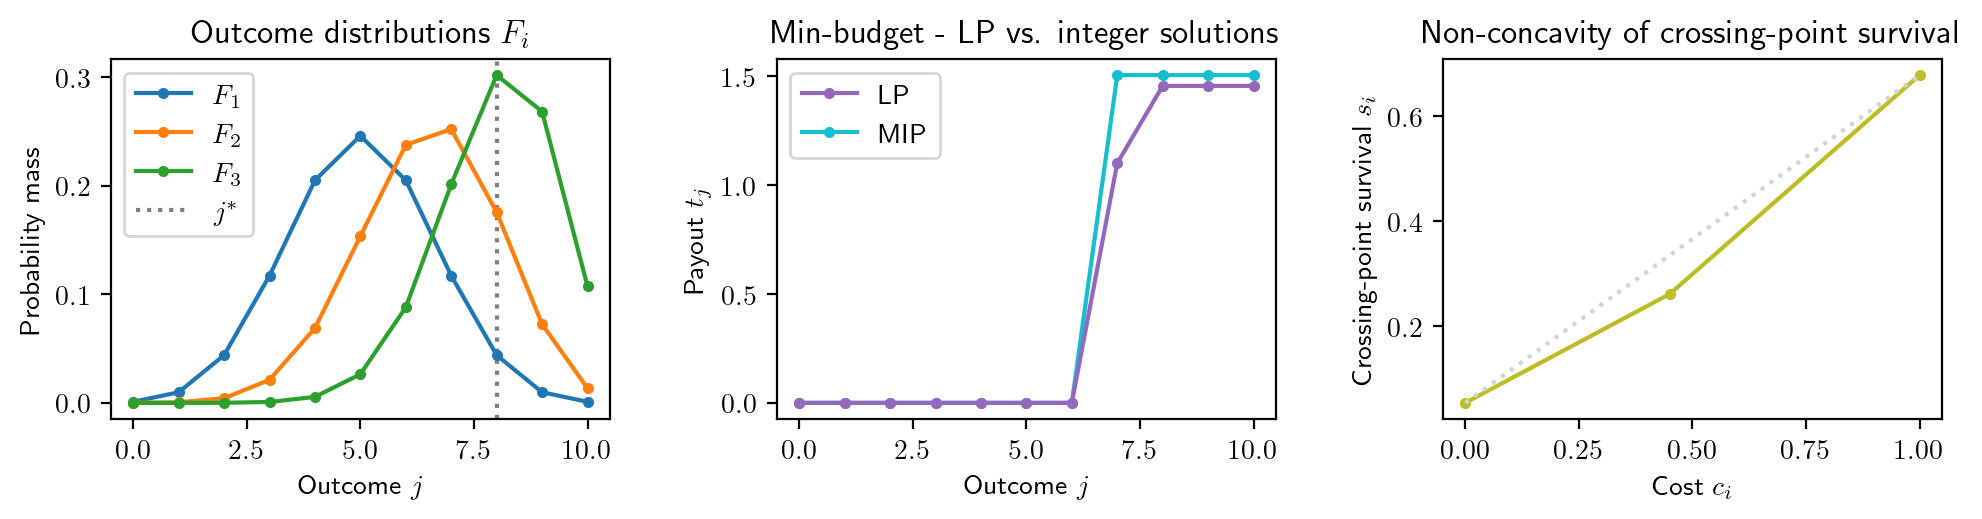

In [4]:
fig,axs = plt.subplots(1,3,figsize=(10,2.7))
axs_it = iter(axs.ravel())

ax = next(axs_it)
ax.plot(cdp.f_ij.T,'.-')
ax.axvline(j0(-2),zorder=-1,label=f'$j^*$',color='tab:gray',linestyle=':')
ax.legend([f'$F_{i+1}$' for i,c in enumerate(cdp.cost)]+['$j^*$'])
ax.set(
    xlabel='Outcome $j$',
    ylabel='Probability mass',
    title='Outcome distributions $F_{i}$',
)

ax = next(axs_it)
ax.plot(t_lp['t'],'.-', color='tab:purple', label='LP')
ax.plot(t_01['t'],'.-', color='tab:cyan', label='MIP', zorder=-1)
ax.legend()
ax.set(
    xlabel='Outcome $j$',
    ylabel='Payout $t_j$',
    title='Min-budget - LP vs. integer solutions',
)

ax = next(axs_it)
ax.plot(cost, sf_ij[:,j0(1)-1],'.-',color='tab:olive')
ax.plot(cost[::2], sf_ij[::2,j0(1)-1], linestyle=':', color='lightgray')
ax.set(
    xlabel='Cost $c_i$',
    ylabel='Crossing-point survival $s_i$',
    title='Non-concavity of crossing-point survival',
)

fig.tight_layout(w_pad=2)
dclf.save_and_download_fig(fig,'./output/contract_design_multi_action_counterexample.pdf')

In [5]:
# Alternative:
f_ij = np.vstack([
    [5,3,2],
    [3,4,3],
    [1,3.5,5.5],
])
f_ij = (f_ij.T/f_ij.T.sum(axis=0)).T

cdp = dclf.ContractDesignProblem(f_ij=f_ij,cost=cost)
t_lp = dclf.MinBudgetContract.design(cdp)
t_01 = dclf.MinBudgetStatisticalContract.design(cdp,monotone=False,binary_domain=True)

print('LP contract: ', format_contract(t_lp))
print('IP contract: ', format_contract(t_01))

LP contract:  0, 1.9, 2.6
IP contract:  0, 2.7, 2.7
